In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from tqdm.auto import tqdm

c:\Users\kolya\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Определение устройства CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
# Определение пути к папкам с данными обучения и тестирования
train_dir = "train"
test_dir = "test"
# Определение размера пакета и количества эпох для обучения
batch_size = 32
num_epochs = 10

In [4]:

# Определение преобразований данных для обучения и тестирования
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создание объектов загрузчиков данных для обучения и тестирования
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


In [5]:
# Загрузка предварительно обученной модели
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(train_data.classes))
model = model.to(device)

c:\Users\kolya\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kolya\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [7]:
# Обучение модели
for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_data)
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))


  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\kolya\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:864: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
 10%|█         | 1/10 [03:09<28:21, 189.02s/it]

Epoch [1/10], Loss: 1.4599


 20%|██        | 2/10 [05:52<23:12, 174.09s/it]

Epoch [2/10], Loss: 0.8834


 30%|███       | 3/10 [08:37<19:48, 169.73s/it]

Epoch [3/10], Loss: 0.7602


 40%|████      | 4/10 [11:20<16:43, 167.24s/it]

Epoch [4/10], Loss: 0.6897


 50%|█████     | 5/10 [14:03<13:48, 165.77s/it]

Epoch [5/10], Loss: 0.6250


 60%|██████    | 6/10 [16:47<11:00, 165.06s/it]

Epoch [6/10], Loss: 0.5838


 70%|███████   | 7/10 [19:31<08:13, 164.59s/it]

Epoch [7/10], Loss: 0.5531


 80%|████████  | 8/10 [22:13<05:27, 163.84s/it]

Epoch [8/10], Loss: 0.5311


 90%|█████████ | 9/10 [24:56<02:43, 163.63s/it]

Epoch [9/10], Loss: 0.4926


100%|██████████| 10/10 [27:40<00:00, 166.07s/it]

Epoch [10/10], Loss: 0.4736


In [8]:
# Тестирование модели
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

In [9]:
# Вывод отчета о классификации
target_names = list(train_data.classes)
print(classification_report(y_true, y_pred, target_names=target_names))

                            precision    recall  f1-score   support

                    XLight       0.94      0.93      0.94       300
                   bandaid       0.65      0.83      0.73       300
                   battery       0.78      0.94      0.85       300
            bowlsanddishes       0.76      0.92      0.84       300
                     bread       0.95      0.81      0.88       300
                      bulb       0.75      0.86      0.80       298
                      cans       0.70      0.96      0.81       300
                    carton       0.90      0.90      0.90       300
                chopsticks       0.72      0.78      0.75       300
             cigarettebutt       0.93      0.74      0.82       300
                   diapers       0.91      0.89      0.90       300
                facialmask       0.80      0.84      0.82       300
               glassbottle       0.85      0.82      0.83       300
                   leaflet       0.78      0.30

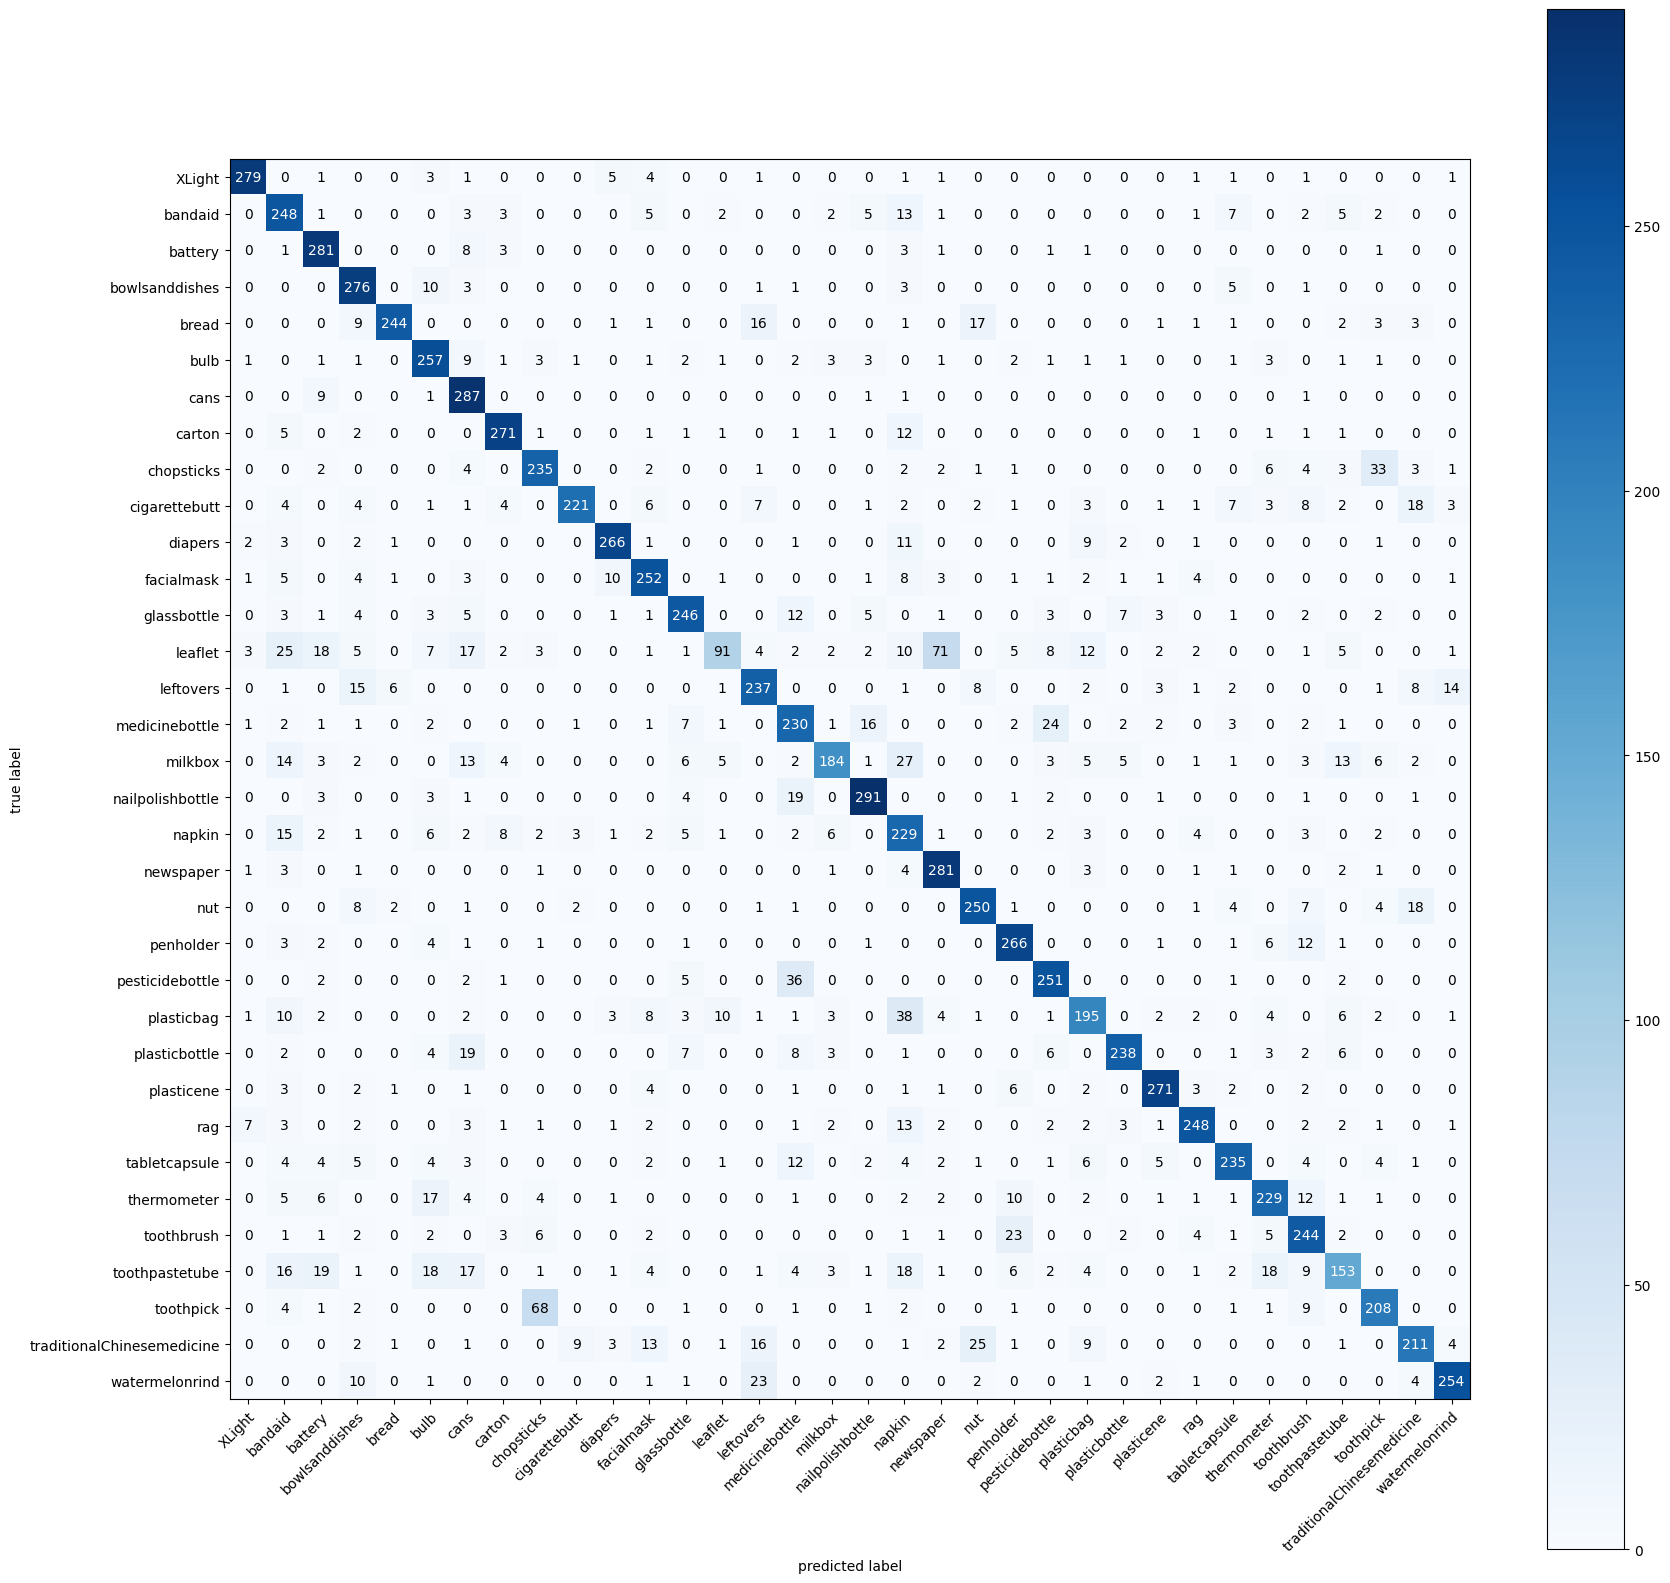

In [14]:
# Вывод матрицы ошибок
cm = confusion_matrix(y_true, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=target_names,colorbar=True,figsize=(20,20))
plt.show()